# 영상의 기하학적 변환

In [2]:
import cv2
import numpy as np
import os 
import matplotlib.pyplot as plt

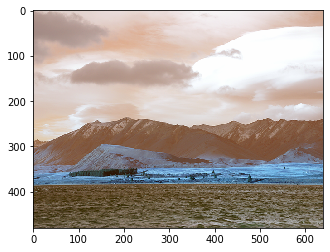

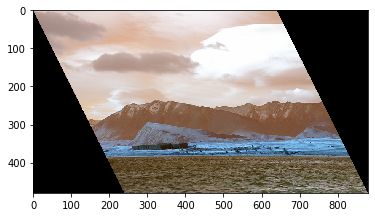

In [9]:
# 전단 변환 (Shear Transformation)


src = cv2.imread('tekapo.bmp')

if src is None:
    print('Image load failed!')
    sys.exit()

aff = np.array([[1, 0.5, 0],
                [0, 1, 0]], dtype=np.float32)

h, w = src.shape[:2]
dst = cv2.warpAffine(src, aff, (w + int(h * 0.5), h))

plt.imshow(src)
plt.show()
plt.imshow(dst)
plt.show()

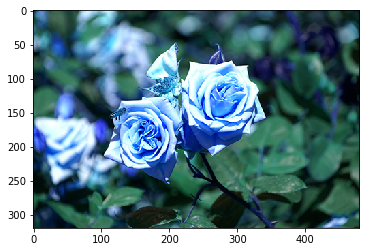

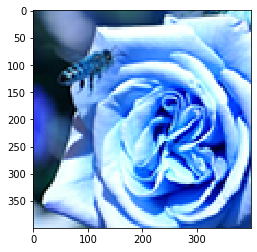

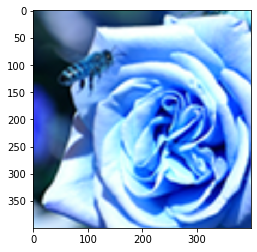

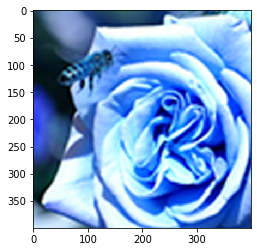

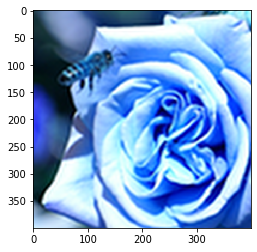

In [12]:
## 영상의 확대와 축소

import sys
import numpy as np
import cv2


src = cv2.imread('rose.bmp') # src.shape=(320, 480)

if src is None:
    print('Image load failed!')
    sys.exit()

dst1 = cv2.resize(src, (0, 0), fx=4, fy=4, interpolation=cv2.INTER_NEAREST)
dst2 = cv2.resize(src, (1920, 1280))  # cv2.INTER_LINEAR
dst3 = cv2.resize(src, (1920, 1280), interpolation=cv2.INTER_CUBIC)
dst4 = cv2.resize(src, (1920, 1280), interpolation=cv2.INTER_LANCZOS4)

plt.imshow(src)
plt.show()
plt.imshow(dst1[500:900, 400:800])
plt.show()
plt.imshow(dst2[500:900, 400:800])
plt.show()
plt.imshow(dst3[500:900, 400:800])
plt.show()
plt.imshow(dst4[500:900, 400:800])
plt.show()


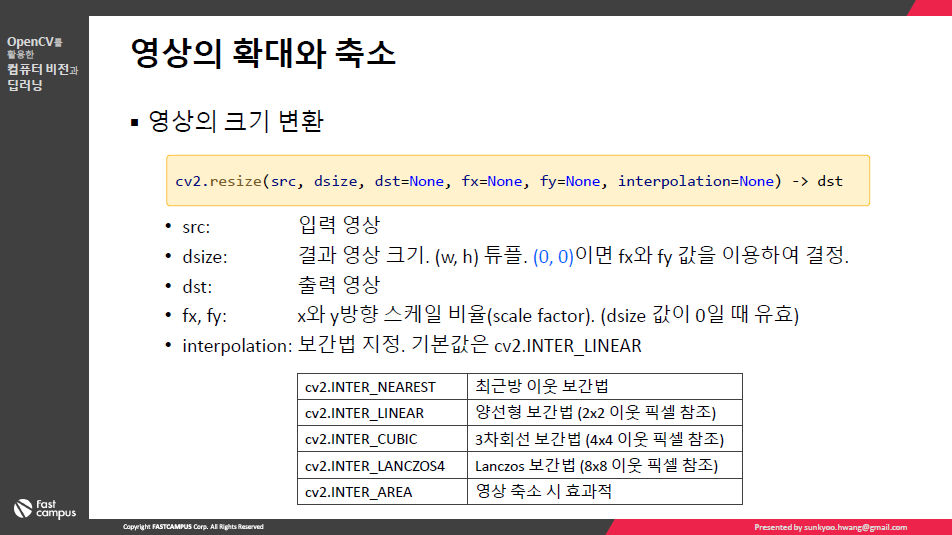

cv2.INTER_NEAREST : 최근방 이웃 보간법

- 가장 빠르지만 성능이 다소 떨어집니다. 잘 쓰이지 않습니다.

 

cv2.INTER_LINEAR : 쌍 선형 보간법

- 효율이 뛰어납니다. 속도와 성능도 준수하여 가장 많이 사용됩니다. 영상 확대 시 주로 이용됩니다.

 

cv2.INTER_CUBIC : 바이큐빅 보간법

- 쌍 선형보다 느리지만 성능이 더 우수합니다. 영상 확대 시 주로 이용됩니다.

 

cv2.INTER_LANCZOS4 : Lanczos 보간법

- 좀 더 복잡해서 오래 걸리지만 훨씬 성능이 우수합니다.

 

cv2.INTER_AREA : 영역 보간법

- 영역의 특징을 추출하여 결과를 지정합니다. 영상 축소 시 주로 이용됩니다.

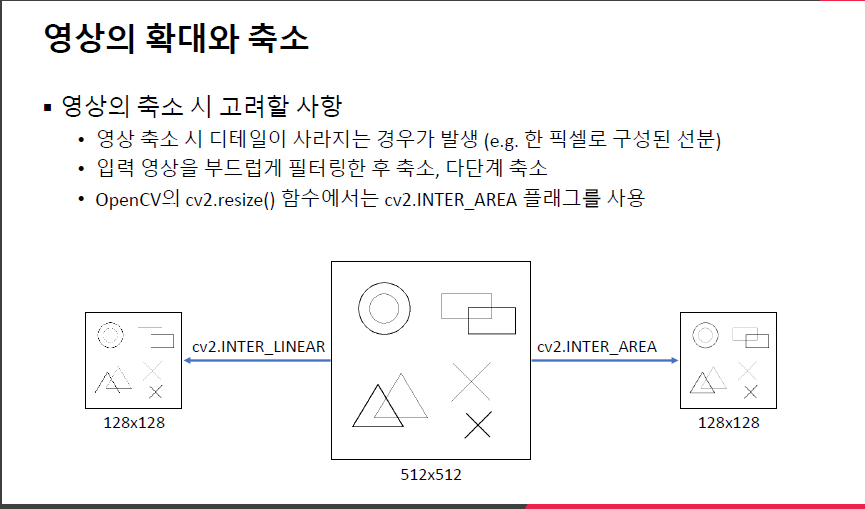

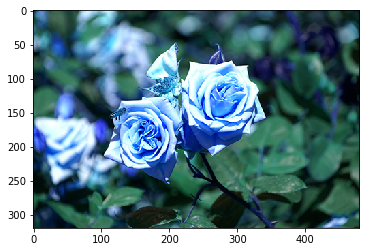

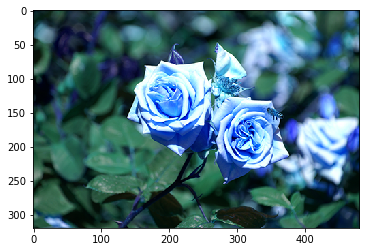

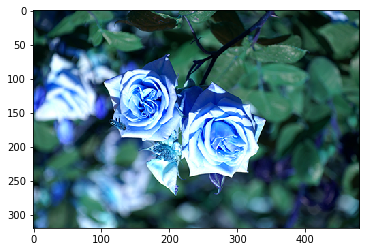

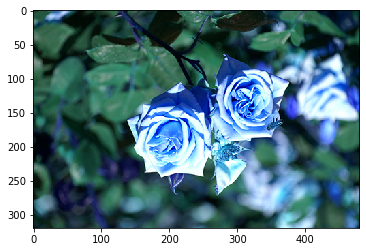

In [15]:
## 영상 대칭 변환

import sys
import numpy as np
import cv2


src = cv2.imread('rose.bmp') # src.shape=(320, 480)

if src is None:
    print('Image load failed!')
    sys.exit()

dst1 = cv2.flip(src, 1)
dst2 = cv2.flip(src, 0)
dst3 = cv2.flip(src, -1)

plt.imshow(src)
plt.show()
plt.imshow(dst1)
plt.show()
plt.imshow(dst2)
plt.show()
plt.imshow(dst3)
plt.show()

In [26]:
### 이미지 피라미드  (다운 샘플링 : 이미지 작게하기)  -> 가우시안 블러링(필터링) 적용후 다운 사이징 실행함

import sys
import numpy as np
import cv2


src = cv2.imread('cat.bmp')

if src is None:
    print('Image load failed!')
    sys.exit()


rc = (250, 120, 200, 200)  # rectangle tuple

# 원본 영상에 그리기
cpy = src.copy()
cv2.rectangle(cpy, rc, (0, 0, 255), 2)
cv2.imshow('src', cpy)
cv2.waitKey()

# 피라미드 영상에 그리기
for i in range(1, 4):
    src = cv2.pyrDown(src)
    cpy = src.copy()
    cv2.rectangle(cpy, rc, (0, 0, 255), 2, shift=i)
    cv2.imshow('src', cpy)
    cv2.waitKey()
    cv2.destroyAllWindows()


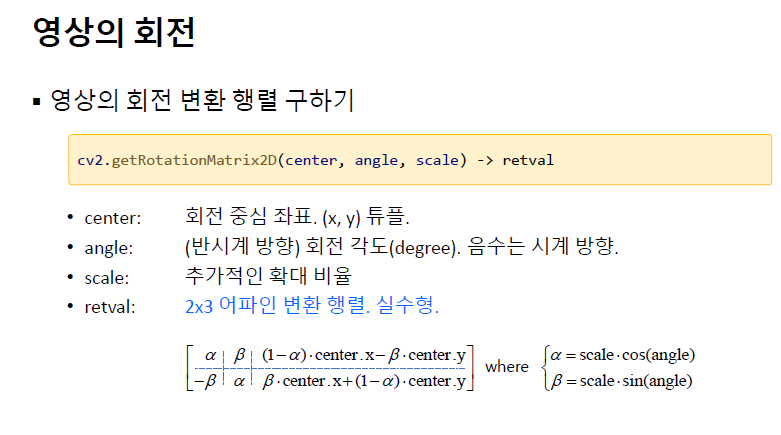

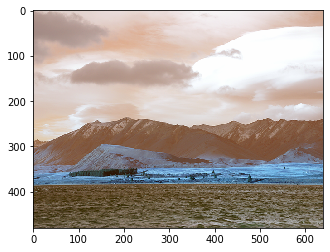

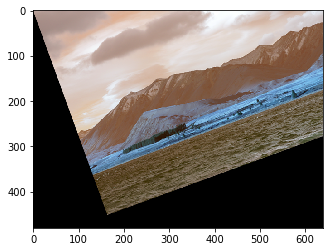

In [30]:
### 영상 회전 

import math

src = cv2.imread('tekapo.bmp')

if src is None:
    print('Image load failed!')
    sys.exit()

rad = 20 * math.pi / 180
aff = np.array([[math.cos(rad), math.sin(rad), 0],
                [-math.sin(rad), math.cos(rad), 0]], dtype=np.float32)

dst = cv2.warpAffine(src, aff, (0, 0))

plt.imshow(src)
plt.show()
plt.imshow(dst)
plt.show()



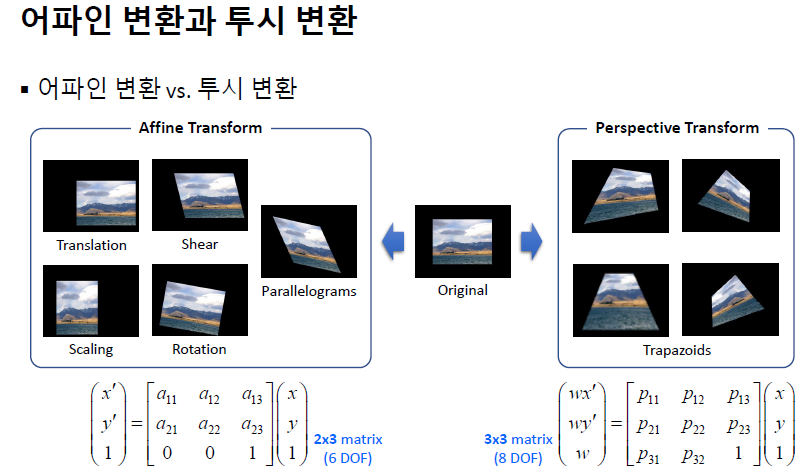


* DOF : Degree of Freedom

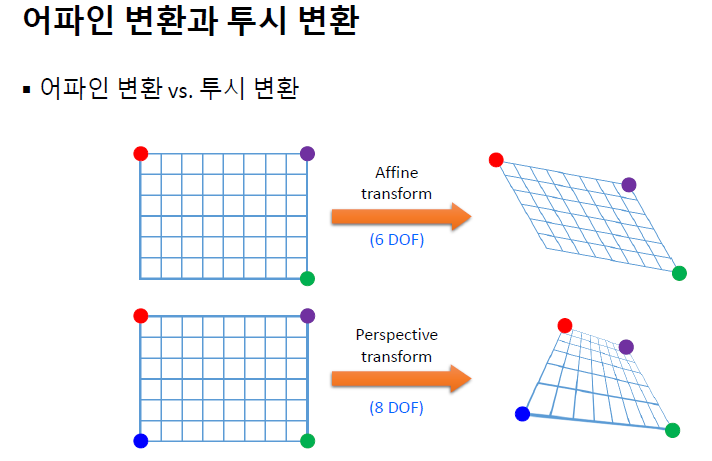

In [50]:
### (어파인 / 투시) 변환 행렬 구하기


w, h = 720, 400

srcaff = np.array([[325, 307], [350, 307], [325, 611]], np.float32)   ## 소스에서 대상 이미지의 꼭지점 좌표
dstaff = np.array([[0, 0], [w-1, 0], [0, h-1]], np.float32) ## 타겟 이미지의 꼭지점 좌표


# 어파인 변환 행렬 구하기
aff= cv2.getAffineTransform(srcaff, dstaff)




srcQuad = np.array([[325, 307], [760, 369], [718, 611], [231, 515]], np.float32)  ## 소스에서 대상 이미지의 꼭지점 좌표
dstQuad = np.array([[0, 0], [w-1, 0], [w-1, h-1], [0, h-1]], np.float32) ## 타겟 이미지의 꼭지점 좌표



# 투시 변환 행렬 구하기
pers = cv2.getPerspectiveTransform(srcQuad, dstQuad)

print(aff, pers)

[[ 2.87600000e+01  0.00000000e+00 -9.34700000e+03]
 [ 1.13686838e-15  1.31250000e+00 -4.02937500e+02]] [[ 2.31201863e+00  1.04485458e+00 -1.07217641e+03]
 [-3.91112017e-01  2.74409238e+00 -7.15324955e+02]
 [ 1.92447649e-04  9.28525377e-04  1.00000000e+00]]


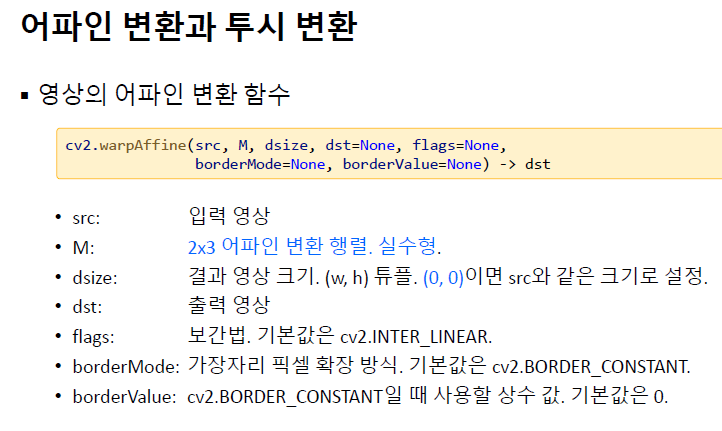

In [ ]:
## 어파인 변환 함수

(투시 변환 예시로 대체)

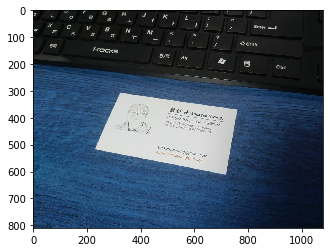

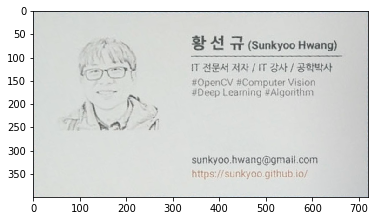

In [43]:
## 투시 변환 함수

import sys
import numpy as np
import cv2


src = cv2.imread('namecard.jpg')

if src is None:
    print('Image load failed!')
    sys.exit()

w, h = 720, 400

## 소스에서 대상 이미지의 꼭지점 좌표
srcQuad = np.array([[325, 307], [760, 369], [718, 611], [231, 515]], np.float32)  

## 타겟 이미지의 꼭지점 좌표
dstQuad = np.array([[0, 0], [w-1, 0], [w-1, h-1], [0, h-1]], np.float32)

## 투시 변환 함수를 생성
pers = cv2.getPerspectiveTransform(srcQuad, dstQuad)

## 생성한 투시 변홤함수를 이용해, 투시 변환 적용
dst = cv2.warpPerspective(src, pers, (w, h))

plt.imshow(src)
plt.show()
plt.imshow(dst)
plt.show()



# 리매핑 : 영상의 특정 위치 픽셀을 다른 위치로 재배치
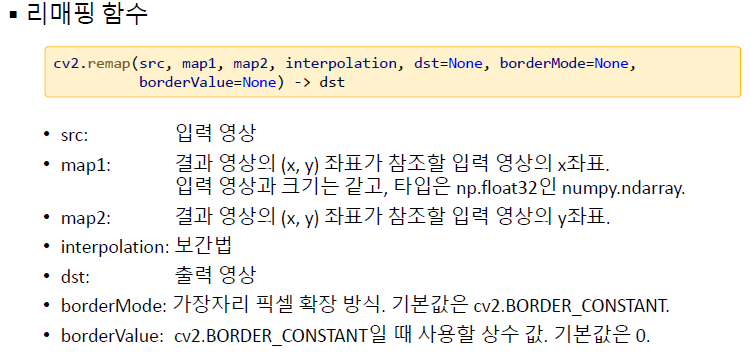

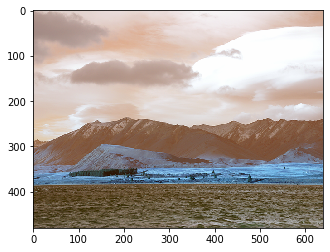

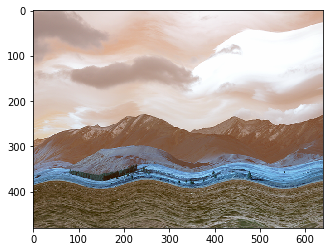

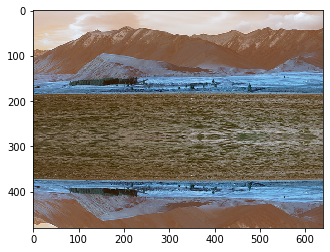

In [22]:
### 리매핑 (ReMapping)

src = cv2.imread('tekapo.bmp')

if src is None:
    print('Image load failed!')
    sys.exit()

h, w = src.shape[:2]

map2, map1= np.indices((h, w), dtype=np.float32)
map3 = map2 + 200
map2 = map2 + 10 * np.sin(map1 / 32)  # sin 함수 적용


dst = cv2.remap(src, map1, map2, cv2.INTER_CUBIC, borderMode=cv2.BORDER_DEFAULT)
dst2 = cv2.remap(src, map1, map3, cv2.INTER_CUBIC, borderMode=cv2.BORDER_DEFAULT)


plt.imshow(src)
plt.show()
plt.imshow(dst)
plt.show()
plt.imshow(dst2)
plt.show()


In [19]:
map3

array([[200., 200., 200., ..., 200., 200., 200.],
       [201., 201., 201., ..., 201., 201., 201.],
       [202., 202., 202., ..., 202., 202., 202.],
       ...,
       [677., 677., 677., ..., 677., 677., 677.],
       [678., 678., 678., ..., 678., 678., 678.],
       [679., 679., 679., ..., 679., 679., 679.]], dtype=float32)

In [20]:
map1

array([[  0.,   1.,   2., ..., 637., 638., 639.],
       [  0.,   1.,   2., ..., 637., 638., 639.],
       [  0.,   1.,   2., ..., 637., 638., 639.],
       ...,
       [  0.,   1.,   2., ..., 637., 638., 639.],
       [  0.,   1.,   2., ..., 637., 638., 639.],
       [  0.,   1.,   2., ..., 637., 638., 639.]], dtype=float32)

In [48]:
## 스캐너 실습

import sys
import numpy as np
import cv2


def drawROI(img, corners):
    cpy = img.copy()

    c1 = (192, 192, 255)
    c2 = (128, 128, 255)

    for pt in corners:
        cv2.circle(cpy, tuple(pt.astype(np.int)), 25, c1, -1, cv2.LINE_AA)

    cv2.line(cpy, tuple(corners[0].astype(int)), tuple(corners[1].astype(int)), c2, 2, cv2.LINE_AA)
    cv2.line(cpy, tuple(corners[1].astype(int)), tuple(corners[2].astype(int)), c2, 2, cv2.LINE_AA)
    cv2.line(cpy, tuple(corners[2].astype(int)), tuple(corners[3].astype(int)), c2, 2, cv2.LINE_AA)
    cv2.line(cpy, tuple(corners[3].astype(int)), tuple(corners[0].astype(int)), c2, 2, cv2.LINE_AA)

    disp = cv2.addWeighted(img, 0.3, cpy, 0.7, 0)

    return disp


def onMouse(event, x, y, flags, param):
    global srcQuad, dragSrc, ptOld, src

    if event == cv2.EVENT_LBUTTONDOWN:
        for i in range(4):
            if cv2.norm(srcQuad[i] - (x, y)) < 25:
                dragSrc[i] = True
                ptOld = (x, y)
                break

    if event == cv2.EVENT_LBUTTONUP:
        for i in range(4):
            dragSrc[i] = False

    if event == cv2.EVENT_MOUSEMOVE:
        for i in range(4):
            if dragSrc[i]:
                dx = x - ptOld[0]
                dy = y - ptOld[1]

                srcQuad[i] += (dx, dy)

                cpy = drawROI(src, srcQuad)
                cv2.imshow('img', cpy)
                ptOld = (x, y)
                break



# 입력 이미지 불러오기
src = cv2.imread('scanned.jpg')

if src is None:
    print('Image open failed!')
    sys.exit()

# 입력 영상 크기 및 출력 영상 크기
h, w = src.shape[:2]
dw = 500
dh = round(dw * 297 / 210)  # A4 용지 크기: 210x297cm

# 최초 스캔 영역을 표시할 네모의 모서리 점들 좌표, 드래그 상태 여부
srcQuad = np.array([[30, 30], [30, h-30], [w-30, h-30], [w-30, 30]], np.float32)
dstQuad = np.array([[0, 0], [0, dh-1], [dw-1, dh-1], [dw-1, 0]], np.float32)
dragSrc = [False, False, False, False]

# 모서리점, 사각형 그리기
disp = drawROI(src, srcQuad)

cv2.imshow('img', disp)
cv2.setMouseCallback('img', onMouse)

while True:
    key = cv2.waitKey()
    if key == 13:  # ENTER 키
        break
    elif key == 27:  # ESC 키
        cv2.destroyWindow('img')
        sys.exit()

# 투시 변환
pers = cv2.getPerspectiveTransform(srcQuad, dstQuad)
dst = cv2.warpPerspective(src, pers, (dw, dh), flags=cv2.INTER_CUBIC)

# 결과 영상 출력
cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()


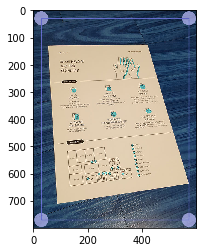